In [21]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
from PIL import Image

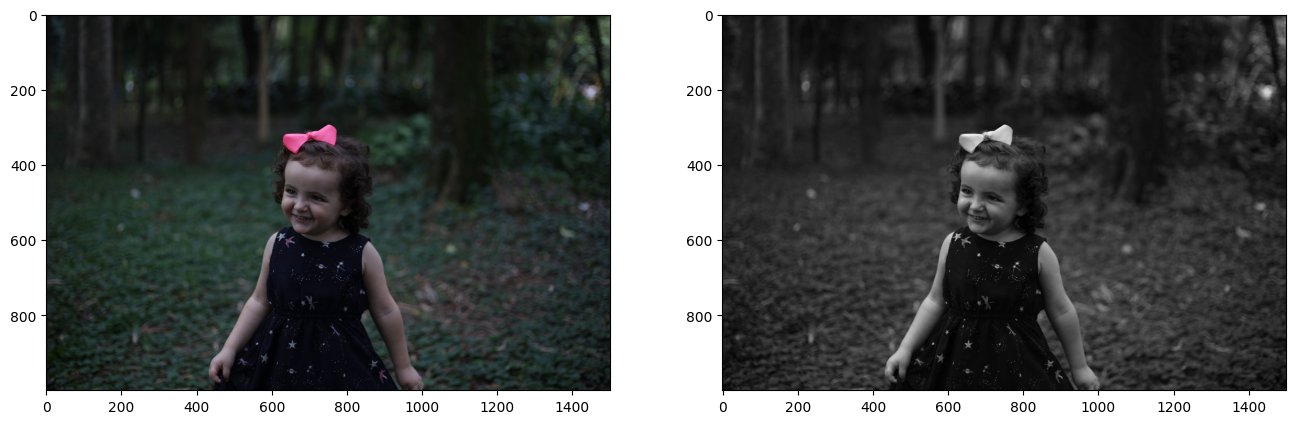

In [26]:
#img = Image.open("sid.jpg")
img = Image.open("girl.jpg")
img_rgb = np.array(img)[:, :, :3]
l, c, p = img_rgb.shape

# converter para escala de cinza:
image_gray = np.zeros(shape=(l, c), dtype=np.uint8)
for i in range(l):
    for j in range(c):
        r = float(img_rgb[i, j, 0])
        g = float(img_rgb[i, j, 1])
        b = float(img_rgb[i, j, 2])
        
        image_gray[i, j] = (r + g + b) / 3

plt.figure(figsize=(16, 16))
plt.subplot(1, 2, 1)
plt.imshow(img_rgb)
plt.subplot(1, 2, 2)
plt.imshow(image_gray, cmap='gray')

In [30]:
abs_tg_c = np.abs(np.diff(image_gray.astype(np.float64), axis=0, append=255))

abs_tg_l = np.abs(np.diff(image_gray.astype(np.float64), axis=1, append=255))

# combinar derivadas das linhas e colunas com norma L2 (distância euclidiana):
abs_tg = np.sqrt(abs_tg_c ** 2 + abs_tg_l ** 2)

# aplicar threshold
threshold = 10
img_border = np.zeros(shape=(l, c), dtype=np.uint8)
img_border[abs_tg > threshold] = 255

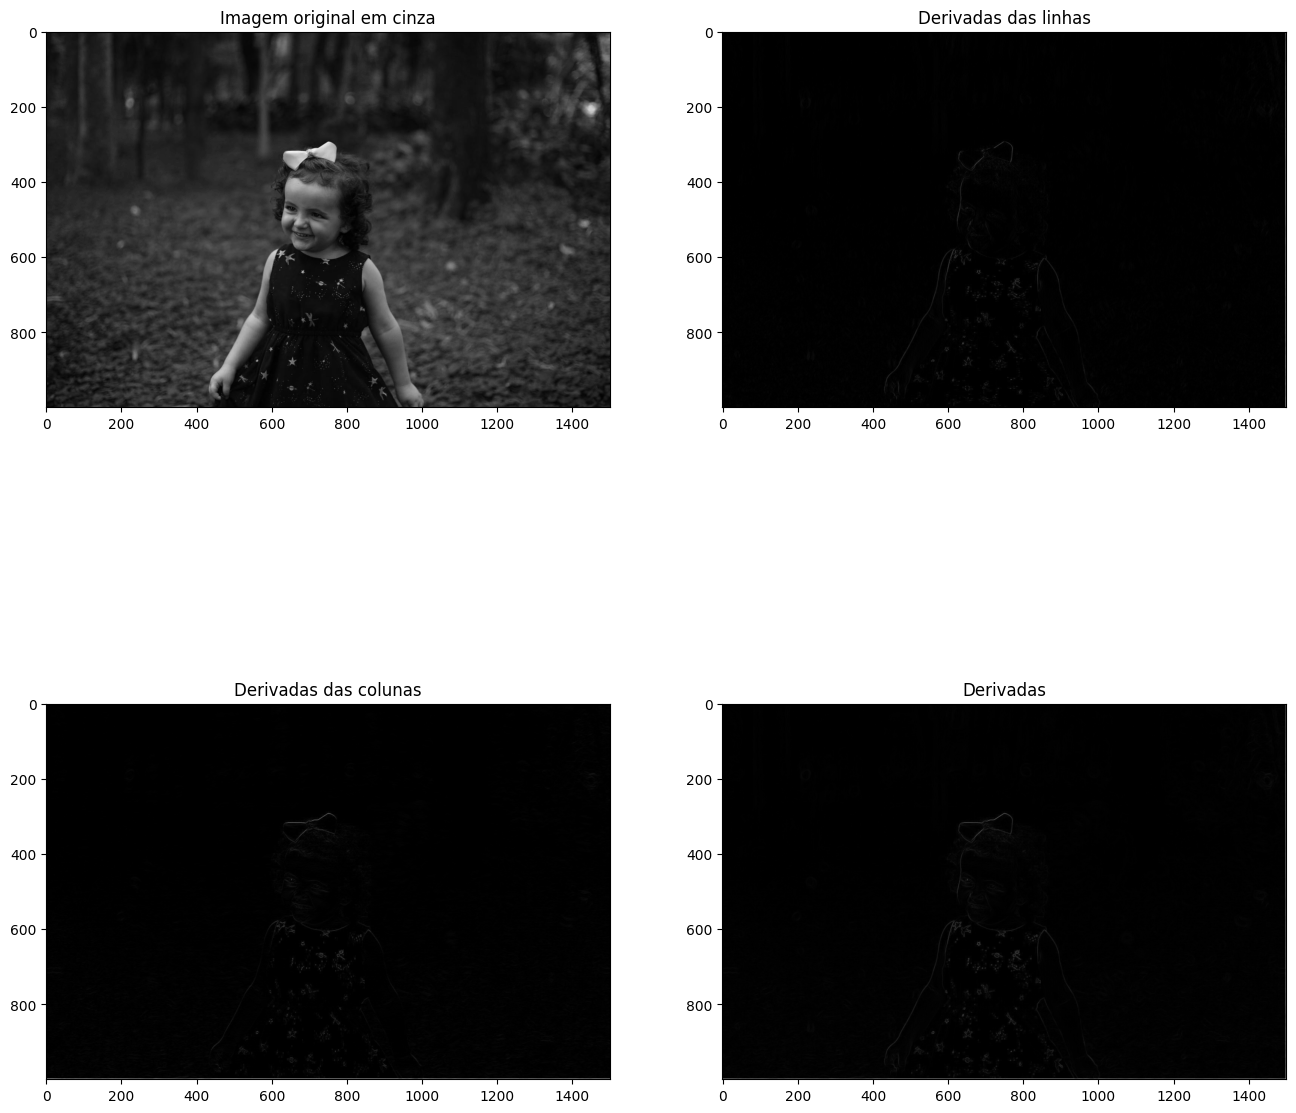

In [31]:
plt.figure(figsize=(16, 16))

plt.subplot(2, 2, 1)
plt.title("Imagem original em cinza")
plt.imshow(image_gray, cmap='gray')

plt.subplot(2, 2, 2)
plt.title("Derivadas das linhas")
plt.imshow(abs_tg_l, cmap='gray')

plt.subplot(2, 2, 3)
plt.title("Derivadas das colunas")
plt.imshow(abs_tg_c, cmap='gray')

plt.subplot(2, 2, 4)
plt.title("Derivadas")
plt.imshow(abs_tg, cmap='gray')

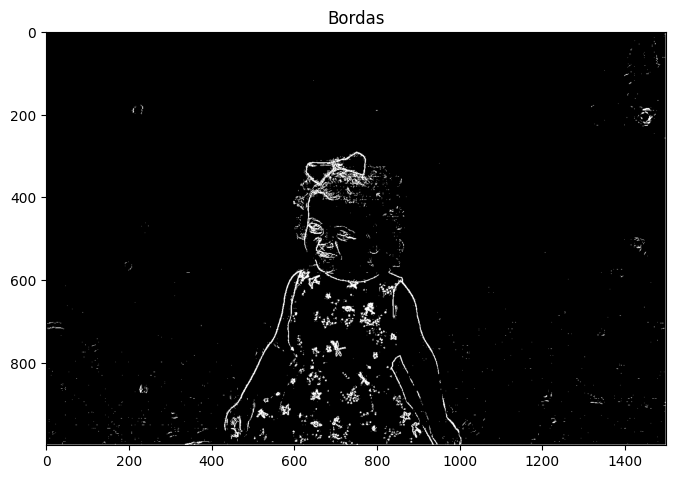

In [32]:
plt.figure(figsize=(8, 8))
plt.title("Bordas")
plt.imshow(img_border, cmap='gray')